In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
eq_data =pd.read_csv("D:\Anurag PhD\EQDS.CSV")

In [6]:
eq_data.columns

Index(['S.No.', 'Data', 'File name', 'Magnitude', 'Focal depth', 'Hypocentre',
       'Avg. S wave', 'Max Acc. (PGA)'],
      dtype='object')

In [7]:
eq_data=eq_data[['Magnitude', 'Focal depth', 'Hypocentre','Avg. S wave', 'Max Acc. (PGA)']]
eq_data.head()

,Magnitude,Focal depth,Hypocentre,Avg. S wave,Max Acc. (PGA)
0,5.1,33,131.818619,145.794388,6.377672
1,4.3,15,59.856194,145.794388,8.008801
2,4.8,12,79.200264,145.794388,9.106972
3,4.7,13,15.818473,145.794388,32.980614
4,4.6,9,52.732956,145.794388,5.124961


In [8]:

eq_data.isnull().sum()

Magnitude         0
Focal depth       0
Hypocentre        0
Avg. S wave       0
Max Acc. (PGA)    0
dtype: int64

<AxesSubplot:>

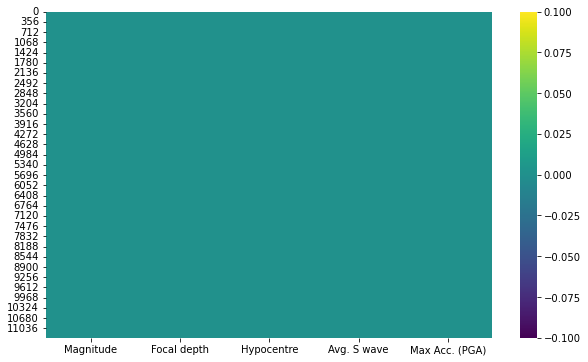

In [13]:
plt.figure(figsize = (10,6))
sns.heatmap(eq_data.isnull(),cmap='viridis')

In [16]:
eq_data.iloc[:,-1].values

array([ 6.377672,  8.008801,  9.106972, ..., 19.110229,  6.17024 ,
        5.455569])

In [17]:
eq_data.corr()

,Magnitude,Focal depth,Hypocentre,Avg. S wave,Max Acc. (PGA)
Magnitude,1.000000,0.072438,0.587565,-0.017964,0.268752
Focal depth,0.072438,1.000000,0.317678,-0.068511,-0.091777
Hypocentre,0.587565,0.317678,1.000000,-0.052745,-0.197168
Avg. S wave,-0.017964,-0.068511,-0.052745,1.000000,-0.003815
Max Acc. (PGA),0.268752,-0.091777,-0.197168,-0.003815,1.000000


<AxesSubplot:>

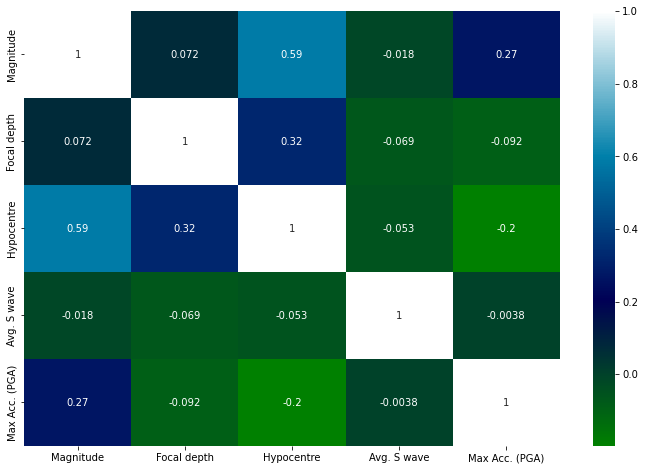

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(eq_data.corr(),annot = True,cmap='ocean')

In [19]:
eq_data.corr().min()

Magnitude        -0.017964
Focal depth      -0.091777
Hypocentre       -0.197168
Avg. S wave      -0.068511
Max Acc. (PGA)   -0.197168
dtype: float64

In [25]:
eq_data.corr()

,Magnitude,Focal depth,Hypocentre,Avg. S wave,Max Acc. (PGA)
Magnitude,1.000000,0.072438,0.587565,-0.017964,0.268752
Focal depth,0.072438,1.000000,0.317678,-0.068511,-0.091777
Hypocentre,0.587565,0.317678,1.000000,-0.052745,-0.197168
Avg. S wave,-0.017964,-0.068511,-0.052745,1.000000,-0.003815
Max Acc. (PGA),0.268752,-0.091777,-0.197168,-0.003815,1.000000


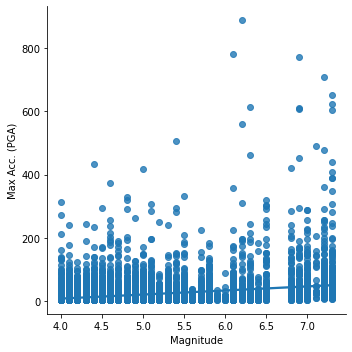

In [30]:
sns.lmplot(x = 'Magnitude',y = 'Max Acc. (PGA)',data = eq_data,markers='o')

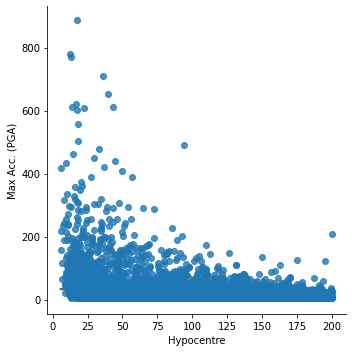

In [31]:
sns.lmplot(x = 'Hypocentre',y = 'Max Acc. (PGA)',data = eq_data,markers='o')

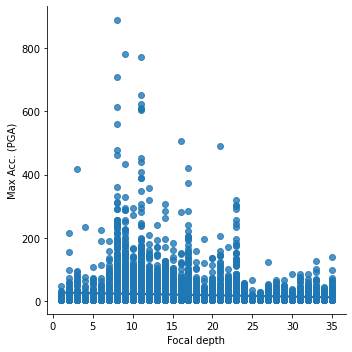

In [33]:
sns.lmplot(x = 'Focal depth',y = 'Max Acc. (PGA)',data = eq_data,markers='o')

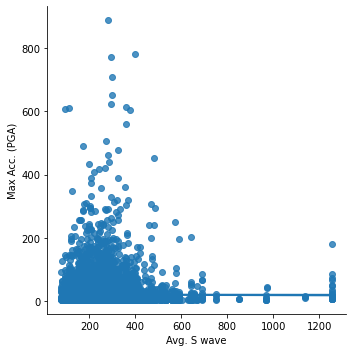

In [34]:
sns.lmplot(x = 'Avg. S wave',y = 'Max Acc. (PGA)',data = eq_data,markers='o')

In [35]:

from sklearn.preprocessing import StandardScaler

In [36]:
sc = StandardScaler()

In [38]:
scale = sc.fit(eq_data.drop(['Max Acc. (PGA)'],axis = 1))

In [39]:
scaled_features = scale.transform(eq_data.drop('Max Acc. (PGA)',axis = 1))

In [40]:
scaled_features

array([[ 0.16250812,  2.06875489,  1.20760205, -1.09207317],
       [-0.82001671, -0.11136933, -0.36323107, -1.09207317],
       [-0.20593869, -0.47472337,  0.05902132, -1.09207317],
       ...,
       [-0.08312309,  1.46316483,  0.68593823, -0.45756373],
       [-0.20593869,  1.2209288 ,  0.69879232, -0.45756373],
       [-0.08312309,  1.46316483,  1.02789314,  0.32102227]])

In [42]:
X = scaled_features
y = eq_data['Max Acc. (PGA)']

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 1)

In [45]:
from sklearn.naive_bayes import GaussianNB


In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

ValueError: Unknown label type: 'continuous'